In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import Image

# 3.4 Logistic Regression

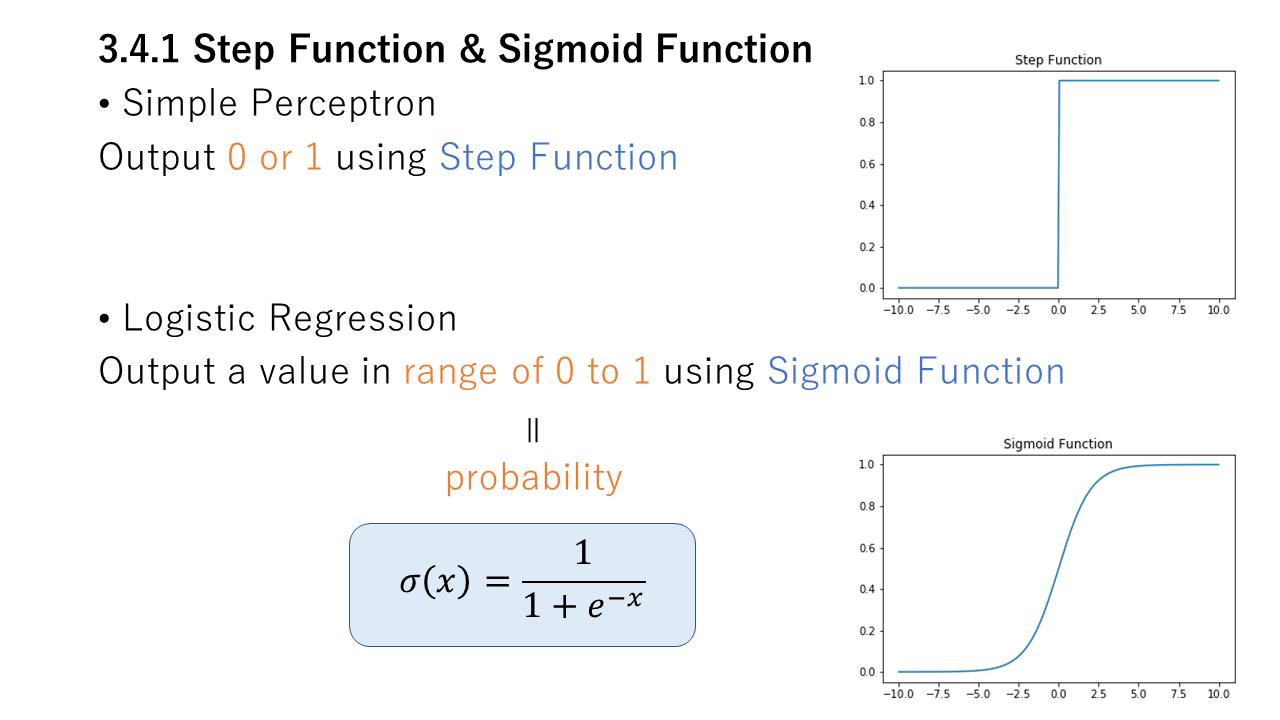

In [8]:
Image('1015fig1.png')

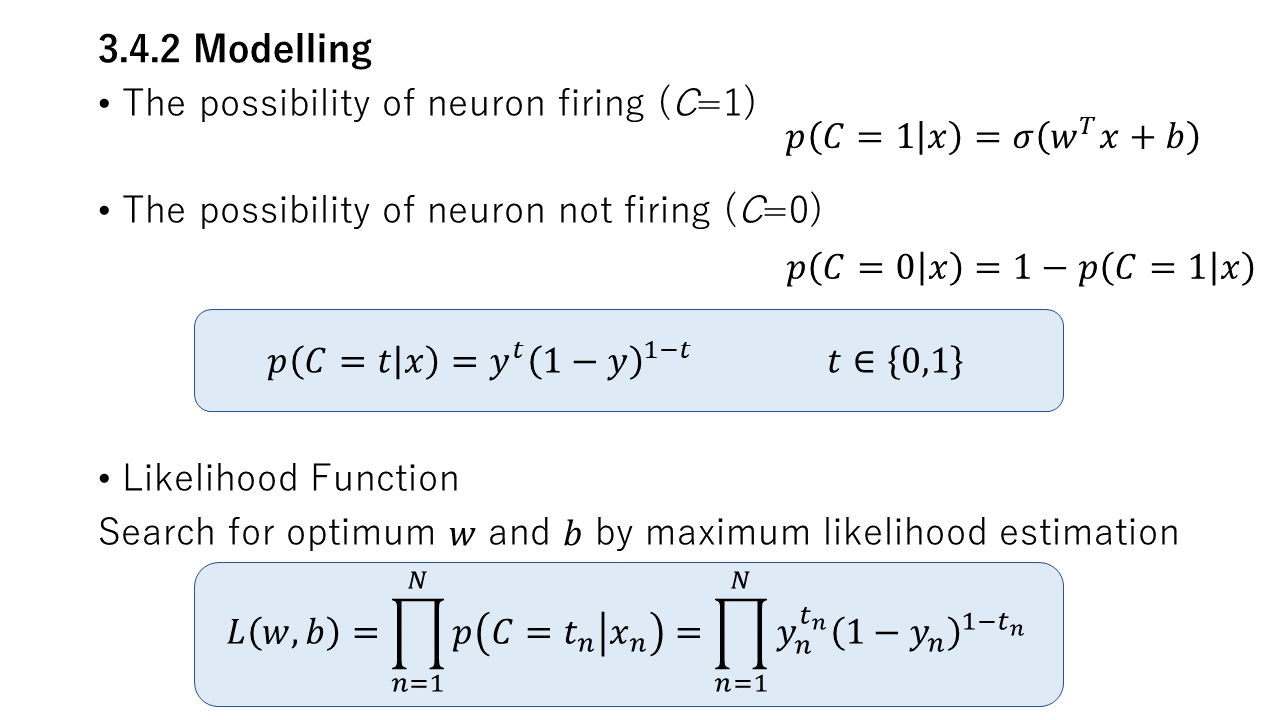

In [12]:
Image('1015fig2.png')

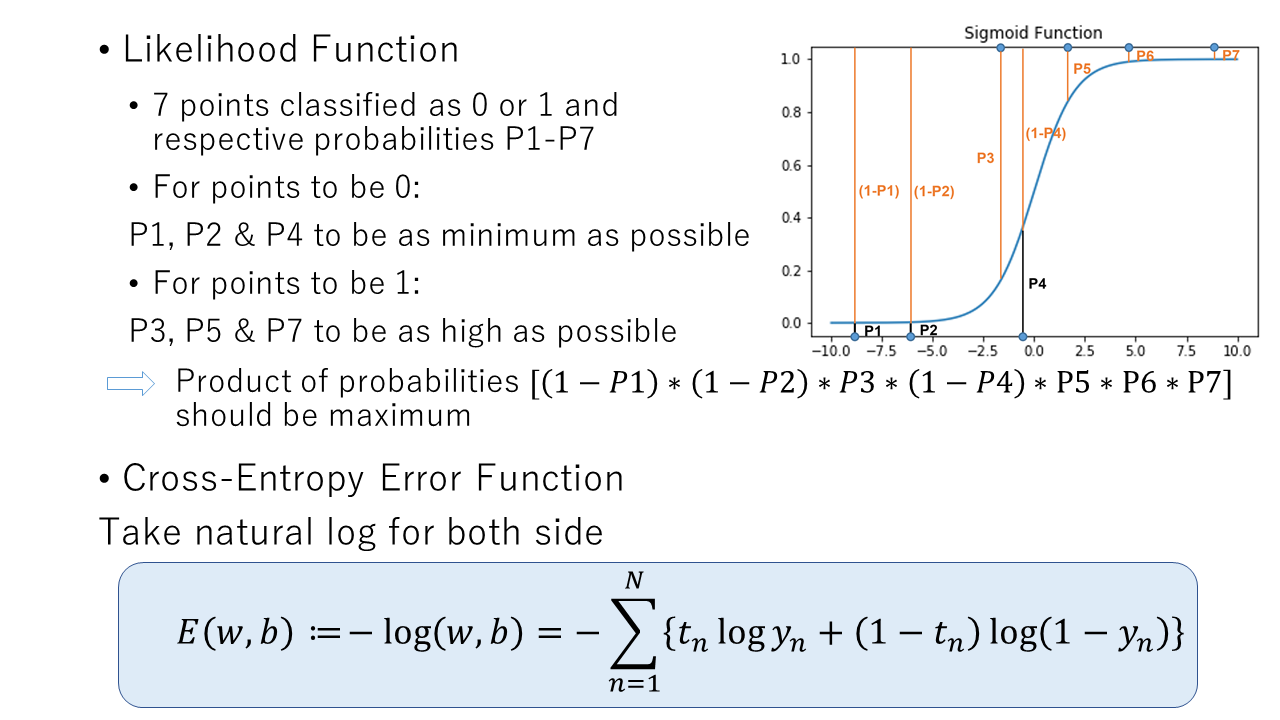

In [5]:
Image('1015fig3.png')

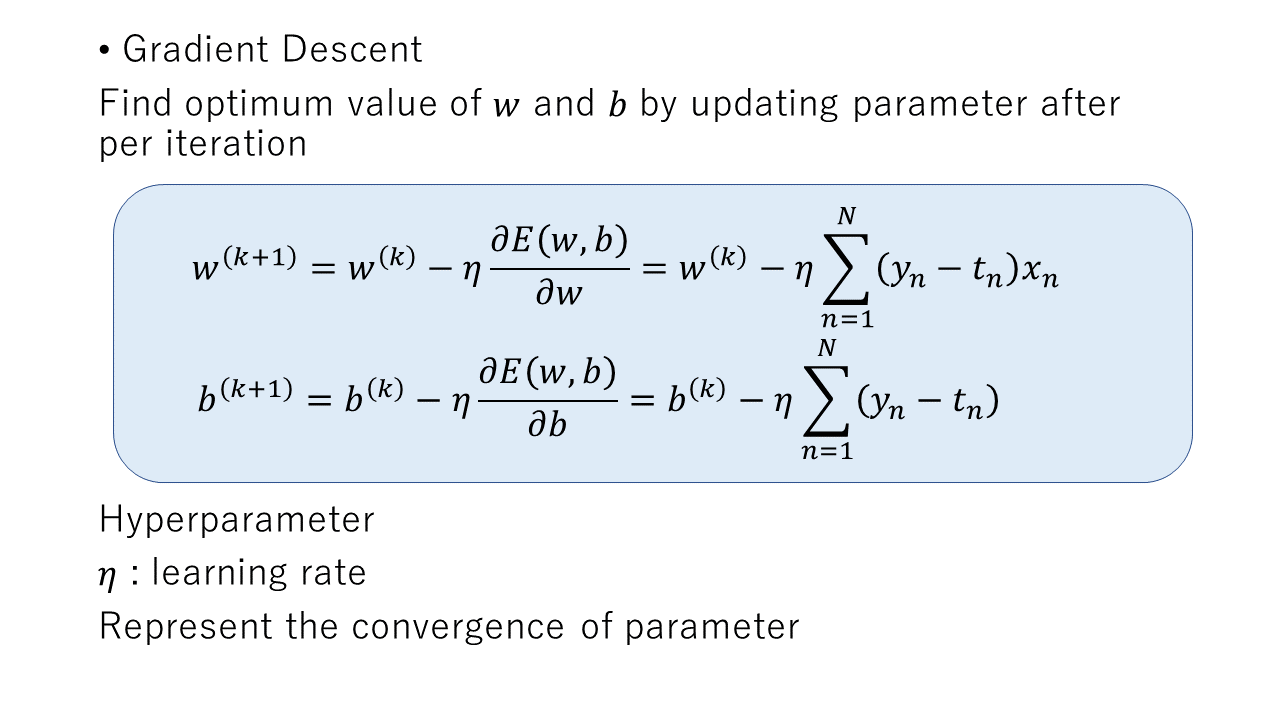

In [11]:
Image('1015fig4.png')

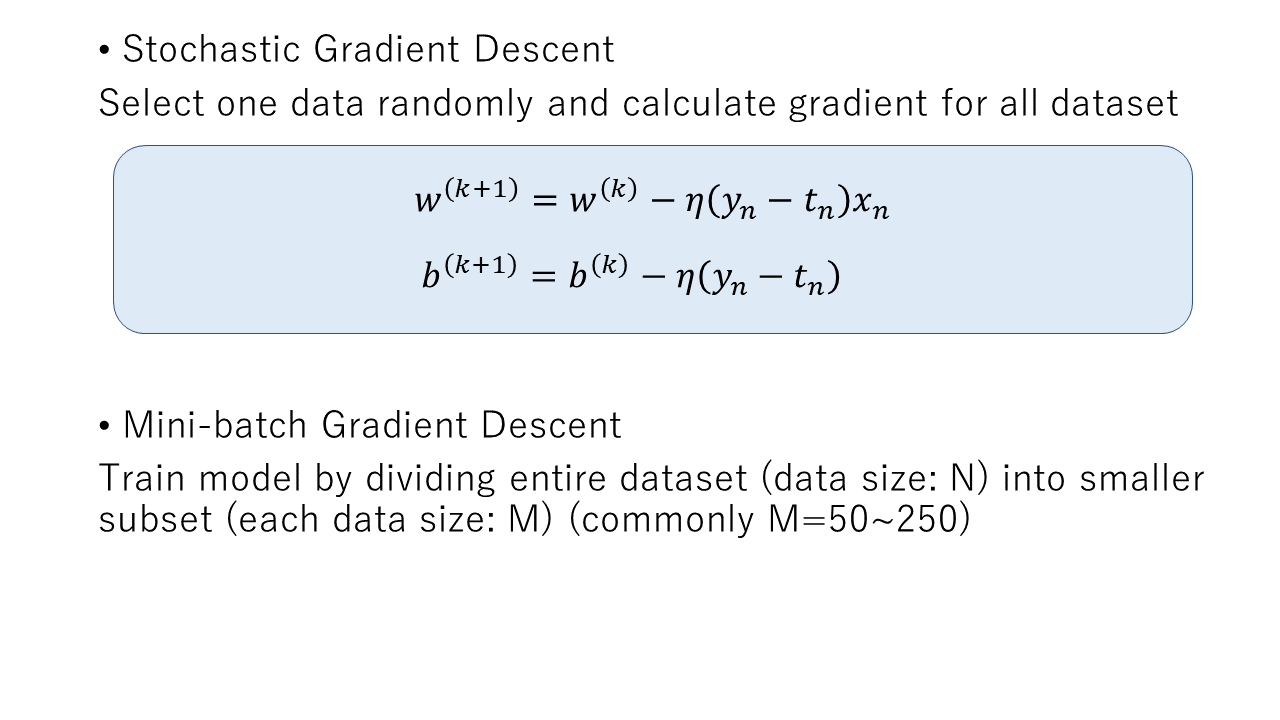

In [13]:
Image('1015fig5.png')

In [8]:
class LogisticRegression(object):
    
    #Logistic Regression
    
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.w = np.random.normal(size=(input_dim),)
        self.b = 0
        
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self,x):
        return sigmoid(np.matmul(x, self.w) + self.b)
    
    def compute_gradients(self, x, t):
        y = self.forward(x)
        delta = y - t
        dw = np.matmul(x.T, delta)
        db = np.matmul(np.ones(x.shape[0]), delta)
        return dw, db
    
#Sigmoid Fuction

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

if __name__ == '__main__':
    
    np.random.seed(123)
    
    #1.Data
    
    x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    t = np.array([0, 1, 1, 1])
    
    #2.Model
    
    model = LogisticRegression(input_dim=2)
    
    #3.Train Model
    
    ########## EXERCISE 1 ##########
    def compute_loss(t,y):
        return ### 1 ###
    
    def train_step(x, t):
        dw, db = model.compute_gradients(x, t)
        model.w = ### 2 ###
        model.b = ### 2 ###
        loss = compute_loss(t, model(x))
        return loss
    ################################
    
    epochs = 100
    
    for epoch in range(epochs):
        train_loss = train_step(x, t) #Batch
        
        if epoch % 10 == 0 or epoch == epochs - 1:
            print('epoch: {}, loss: {:.3f}'.format(epoch+1, train_loss))
            
    #4.Evaluate Model
            
    for input in x:
        print('{} => {:.3f}'.format(input,model(input)))

epoch: 1, loss: 2.812
epoch: 11, loss: 1.782
epoch: 21, loss: 1.514
epoch: 31, loss: 1.339
epoch: 41, loss: 1.201
epoch: 51, loss: 1.087
epoch: 61, loss: 0.991
epoch: 71, loss: 0.911
epoch: 81, loss: 0.842
epoch: 91, loss: 0.782
epoch: 100, loss: 0.735
[0 0] => 0.361
[0 1] => 0.900
[1 0] => 0.844
[1 1] => 0.988


<font size=5, color='red'>EXERCISE 1<font>

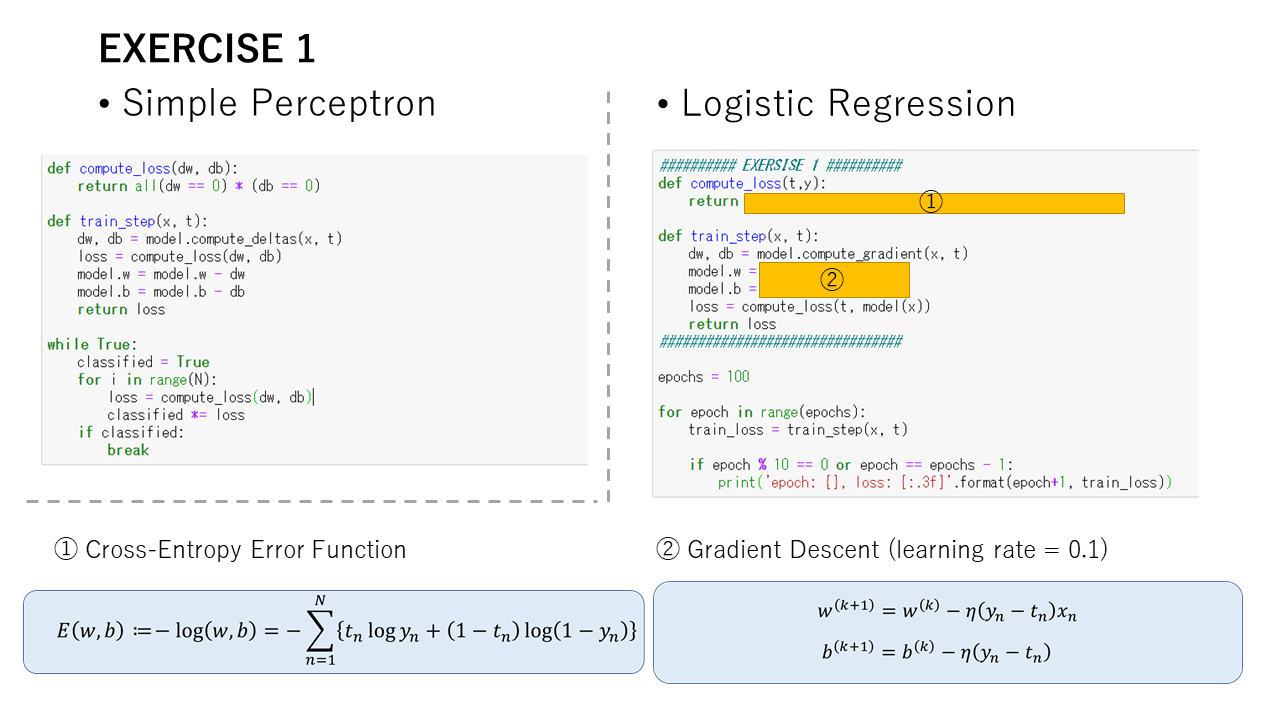

In [15]:
Image('1015fig7.png')

# 3.5 Multiclass Logistic Regression

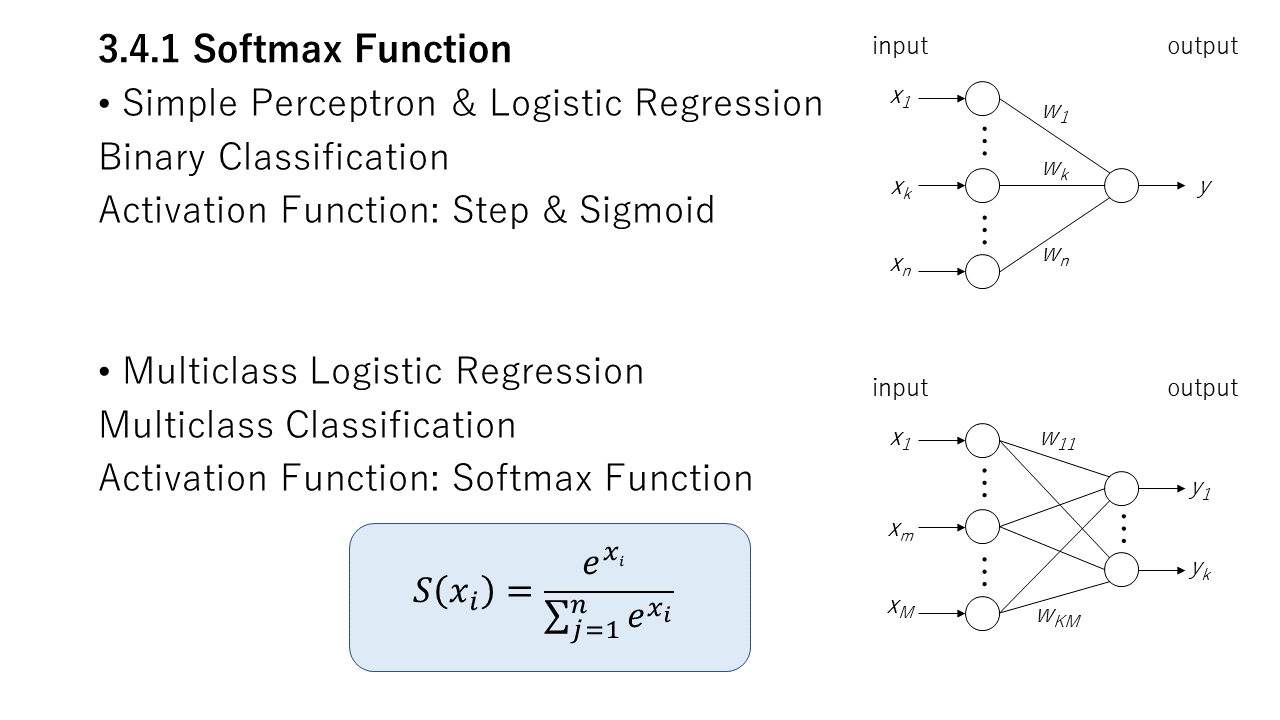

In [7]:
Image('1015fig6.png')

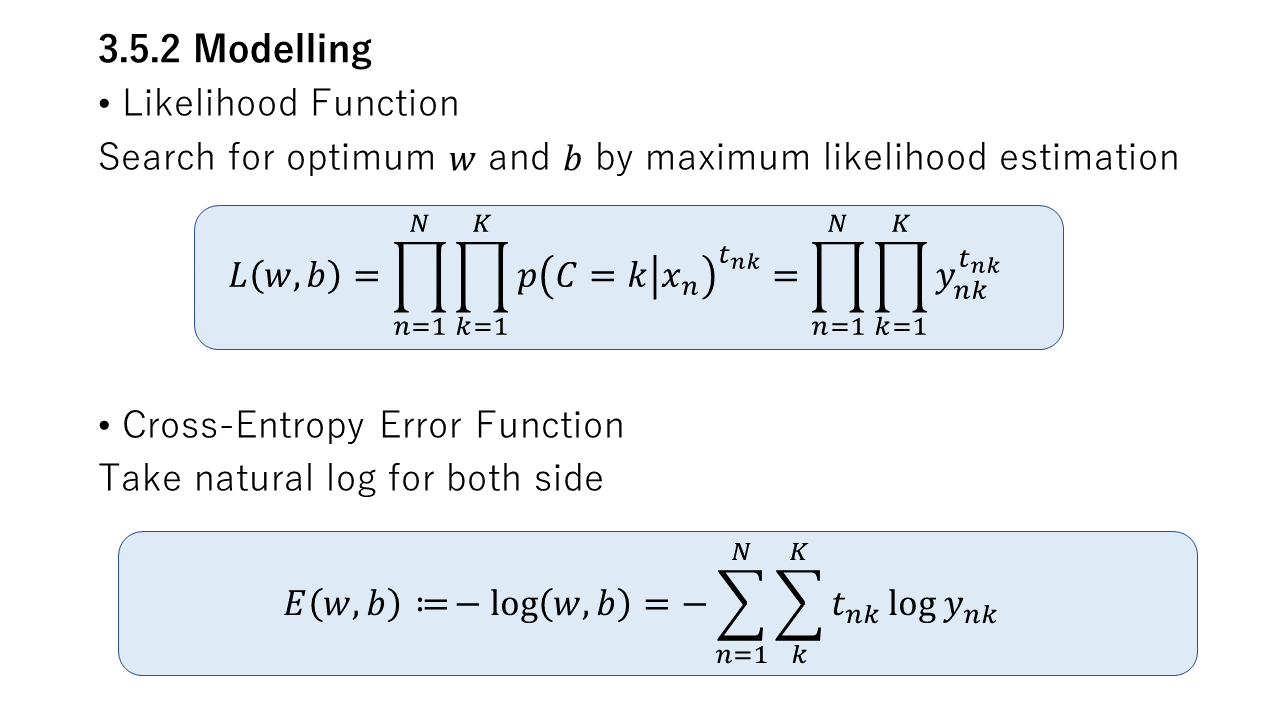

In [6]:
Image('1015fig.png')

In [17]:
class LogisticRegression(object):
    
    #Multiclass Logistic Regression
    
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.W = np.random.normal(size=(input_dim, output_dim))
        self.b = np.zeros(output_dim)
        
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self,x):
        return softmax(np.matmul(x, self.W) + self.b)
    
    def compute_gradients(self, x, t):
        y = self.forward(x)
        delta = y - t
        dW = np.matmul(x.T, delta)
        db = np.matmul(np.ones(x.shape[0]), delta)
        return dW, db
    
#Softmax Fuction

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

if __name__ == '__main__':
    
    np.random.seed(123)
    
    #1.Data
    
    M = 2 #dimension of input data
    K = 3 #number of class
    n = 100 #data size for each class
    N = n * K #entire data size
    
    x1 = np.random.randn(n, M) + np.array([0, 10])
    x2 = np.random.randn(n, M) + np.array([5, 5])
    x3 = np.random.randn(n, M) + np.array([10, 0])
    t1 = np.array([[1, 0, 0] for i in range(n)])
    t2 = np.array([[0, 1, 0] for i in range(n)])
    t3 = np.array([[0, 0, 1] for i in range(n)])
    
    x = np.concatenate((x1, x2, x3), axis=0)
    t = np.concatenate((t1, t2, t3), axis=0)
    
    #2.Model
    
    model = LogisticRegression(input_dim=M, output_dim=K)
    
    #3.Train Model
    
    def compute_loss(t,y):
        return (-t * np.log(y)).sum(axis=1).mean()
    
    def train_step(x, t):
        dW, db = model.compute_gradients(x, t)
        model.W = model.W - 0.1 * dW
        model.b = model.b - 0.1 * db
        loss = compute_loss(t, model(x))
        return loss
    
    epochs = 10
    batch_size = 50
    n_batches = x.shape[0] // batch_size
    
    for epoch in range(epochs):
        train_loss = 0
        x_, t_ = shuffle(x, t)
        
        for n_batch in range(n_batches):
            start = n_batch * batch_size
            end = start + batch_size
            
            train_loss += train_step(x_[start:end], t_[start:end])
        
        if epoch % 10 == 0 or epoch == epochs - 1:
            print('epoch: {}, loss: {:.3f}'.format(epoch+1, train_loss))
            
    #4.Evaluate Model
            
    x_, t_ = shuffle(x, t)
    preds = model(x_[0:5])
    classified = np.argmax(t_[0:5], axis=1) == np.argmax(preds[0:5], axis=1)
    print('Prediction matched:', classified)

epoch: 1, loss: 100.495
epoch: 10, loss: 0.000
Prediction matched: [ True  True  True  True  True]


<font size=5, color='red'>EXERCISE 2<font>

Let's try coding Logistic Regression using sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

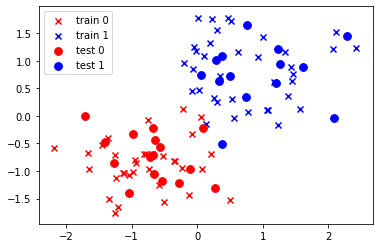

In [19]:
np.random.seed(seed=0)
X_0 = np.random.multivariate_normal( [2,2],  [[2,0],[0,2]],  50 )
y_0 = np.zeros(len(X_0))
 
X_1 = np.random.multivariate_normal( [6,7],  [[3,0],[0,3]],  50 )
y_1 = np.ones(len(X_1))
 
X = np.vstack((X_0, X_1))
y = np.append(y_0, y_1)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
 
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')
 
plt.legend(loc='upper left')

<font size=5, color='red'>ANSWER<font>

<font size=5, color='red'>EXERCISE 1<font>

In [ ]:
########## EXERCISE 1 ##########
def compute_loss(t,y): #Cross-Entropy Error Function
    return (-t * np.log(y) - (1 - t) * np.log(1 - y)).sum()

def train_step(x, t): #Gradient Descent #Learning Rate=0.1
    dw, db = model.compute_gradient(x, t)
    model.w = model.w - 0.1 * dw
    model.b = model.b - 0.1 * db
    loss = compute_loss(t, model(x))
    return loss
################################

epochs = 100

for epoch in range(epochs):
    train_loss = train_step(x, t)

    if epoch % 10 == 0 or epoch == epochs - 1:
        print('epoch: {}, loss: {:.3f}'.format(epoch+1, train_loss))

<font size=5, color='red'>EXERCISE 2<font>

In [20]:
#train
lr = linear_model.LogisticRegression()
lr.fit(X_train_std, y_train)

C:\Users\Akane Arise\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
#accuracy
print (lr.score(X_test_std, y_test))

0.9666666666666667


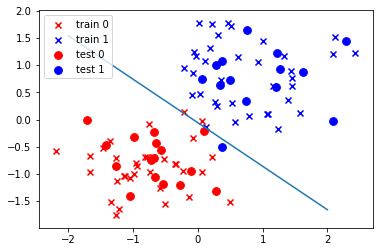

In [23]:
#Desicion Boundary
# w0 + w_1・x + w_2・y = 0
# ⇒ y = (-w_1・x - w_0) / w_2

w_0 = lr.intercept_[0]
w_1 = lr.coef_[0,0]
w_2 = lr.coef_[0,1]
 
p = np.linspace(-2, 2, 256)
q = (- w_1 * p - w_0)/w_2
plt.plot(p, q)

plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

plt.legend(loc='upper left')